In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, KFold

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import macrophages_analysis

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset = nucleus_dataset_206.merge(nucleus_dataset_86, how='outer')

## 20x_CD206+CD86_TCPS_intensity

In [3]:
nucleus_dataset_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset, 'Intensity')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8838245614035088
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.89336451064777
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8837358348959377


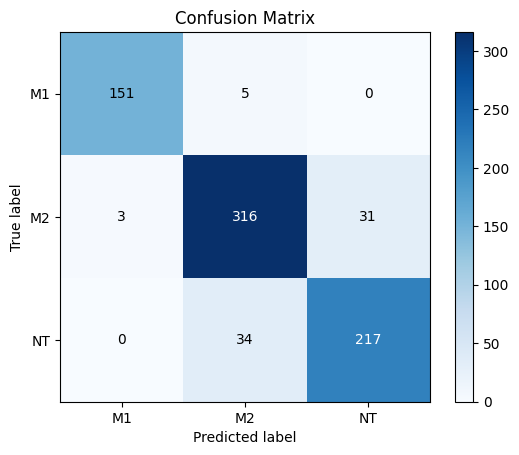

In [4]:
pipe_intensity, test_data_intensity = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_intensity, confusion_matrix=True)

AUC score for M1 0.9989653995477623
AUC score for M2 0.9678273078273079
AUC score for NT 0.9729540336677007
Average AUC 0.9799155803475902


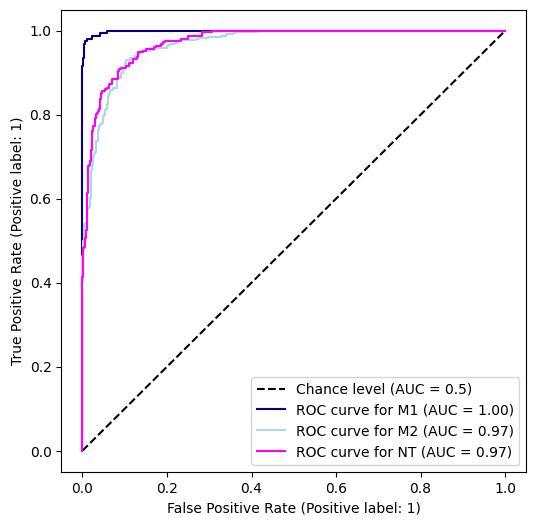

In [5]:
macrophages_analysis.make_multiclass_roc(pipe_intensity, test_data_intensity)

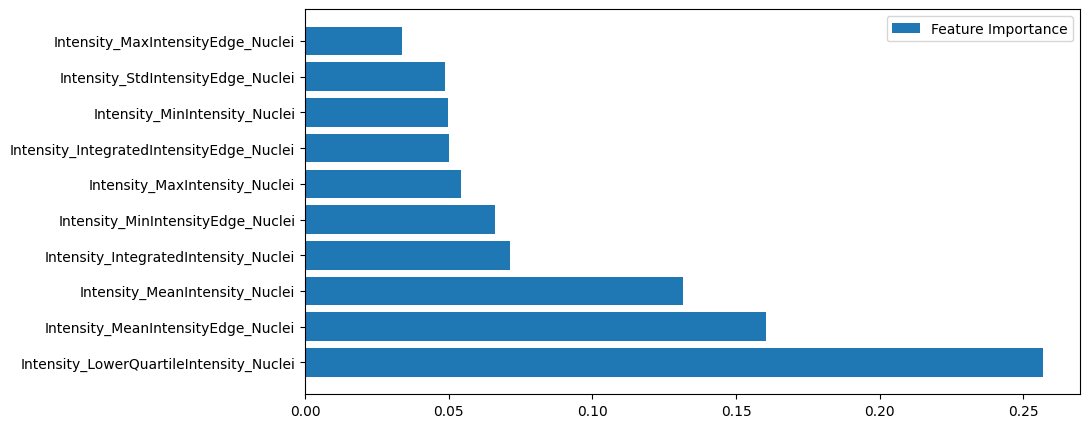

In [6]:
important_features = macrophages_analysis.get_best_features(pipe_intensity, nucleus_dataset_intensity.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

## 20x_CD206+CD86_TCPS_shape

In [7]:
nucleus_dataset_shape = macrophages_analysis.select_features_by_name(nucleus_dataset, 'Area')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.5390526315789474
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.529637762567859
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.5322922805852125


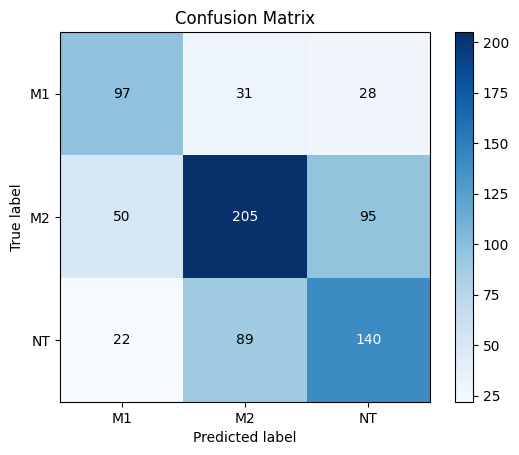

In [8]:
pipe_shape, test_data_shape = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_shape, confusion_matrix=True)

AUC score for M1 0.8522974529630104
AUC score for M2 0.7134713934713935
AUC score for NT 0.7501377887658851
Average AUC 0.7719688784000963


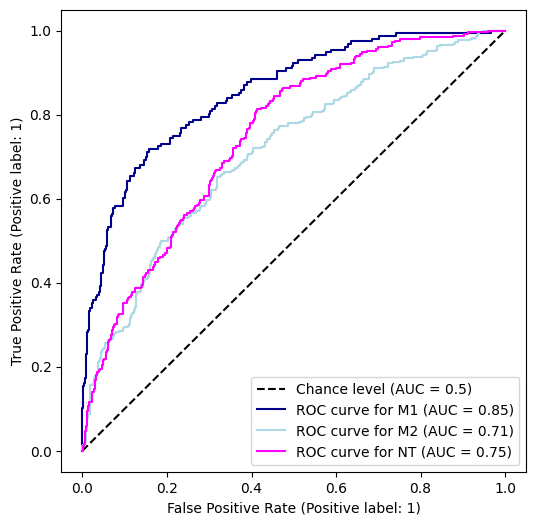

In [9]:
macrophages_analysis.make_multiclass_roc(pipe_shape, test_data_shape)

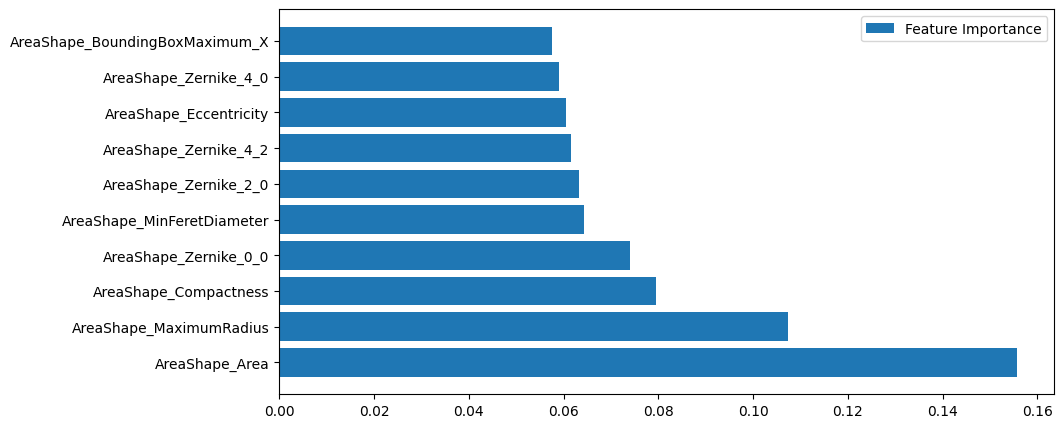

In [10]:
important_features = macrophages_analysis.get_best_features(pipe_shape, nucleus_dataset_shape.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()

## 20x_CD206+CD86_TCPS_texture

In [11]:
nucleus_dataset_texture = macrophages_analysis.select_features_by_name(nucleus_dataset, 'Texture')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.6776140350877193
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.6802904451437116
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.6772445426226219


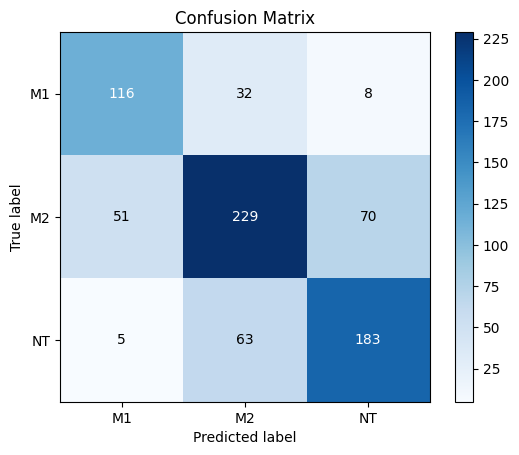

In [12]:
pipe_texture, test_data_texture = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_texture, confusion_matrix=True)

AUC score for M1 0.9074619224369639
AUC score for M2 0.7815373815373815
AUC score for NT 0.8921468277089271
Average AUC 0.8603820438944242


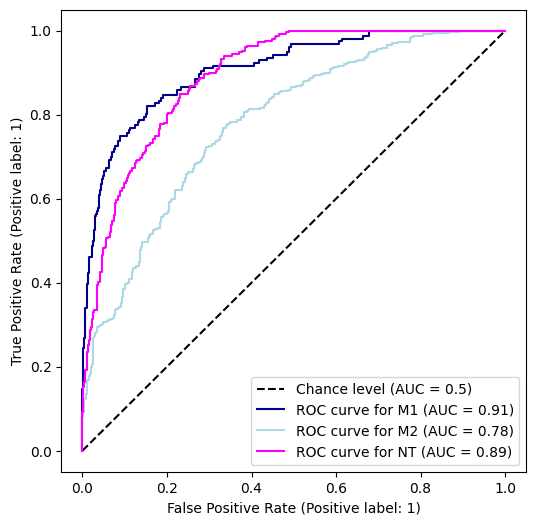

In [13]:
macrophages_analysis.make_multiclass_roc(pipe_texture, test_data_texture)

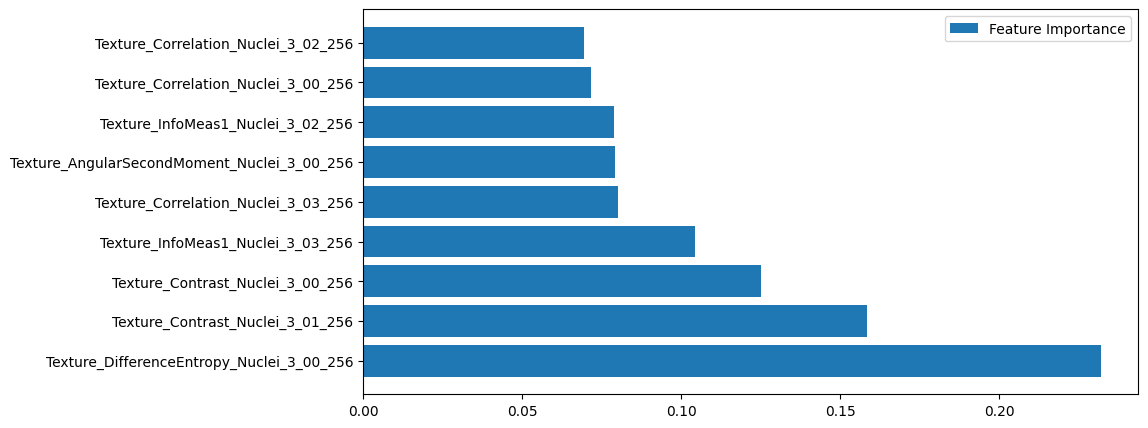

In [14]:
important_features = macrophages_analysis.get_best_features(pipe_texture, nucleus_dataset_texture.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features['Feature'], important_features['Importance'], label='Feature Importance')
ax.legend()